# Chapter 2. Multi-armed Bandits

In [17]:
import numpy as np
import os
from tqdm import tqdm_notebook

np.random.seed(77)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["figure.figsize"] = (11,4)

plt.rcParams['axes.unicode_minus'] = False

PROJECT_ROOT_DIR = "."
CHAPTER_ID = '10_armed_testbed'

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## 2.3 The 10-Armed Testbed

In [ ]:
def sample_average(t, action, actions, epsilon = 0):
    
    sum_rewards = 0
    sum_predicate = 0
    
    if t <= 1:
        return 0
   
    else:
        for i in range(t-1):
            predicate = 0
            
            reward = get_reward(action)
            
            if actions[i] == action:
                predicate = 1
            sum_rewards += reward*predicate
            sum_predicate += predicate
            
        if sum_predicate == 0:
            return 0
            
        return sum_rewards/sum_predicate
    
def get_reward(action):
    return np.random.normal(q_rewards[action],1)

def argmax(array):
    top_index = [0]
    top = array[0]
    
    for i in range(1,len(array)):
        if array[i] > top:
            top_index = [i]
            top = array[i]
        elif array[i] == top:
            top_index.append(i)
        
    np.random.shuffle(top_index)
        
    return top_index[0]

def epsilon_greedy_action_selection(t, actions, epsilon = 0):

    rand = np.random.rand(1)[0]

    if t <= 0 or epsilon >= rand:            
        return np.random.choice(10,1)[0]

    else:
        Q_t = []
        for i in ACTION:
            Q_t.append(sample_average(t,i, actions, epsilon))
        return argmax(Q_t)

In [ ]:
RUN = 100
STEP = 1000
ACTION = [i for i in range(10)]

q_rewards = []
for _ in range(10):
    tmp = np.random.normal(0,1)
    q_rewards.append(tmp)
    
optimal_action = np.argmax(q_rewards)

average_greedy_reward = [0]*STEP
e1_average_greedy_reward = [0]*STEP
e2_average_greedy_reward = [0]*STEP

greedy_optimal_action_ratio = [0]*STEP
e1_greedy_optimal_action_ratio = [0]*STEP
e2_greedy_optimal_action_ratio = [0]*STEP

## testbed
for t in tqdm_notebook(range(RUN)):
    
    ## greedy
    greedy_actions = []

    for i in range(STEP):
        greedy_actions.append(epsilon_greedy_action_selection(i, greedy_actions))
        if greedy_actions[i] == optimal_action:
            greedy_optimal_action_ratio[i] += 1/RUN
        average_greedy_reward[i] += get_reward(greedy_actions[i])/RUN
        
    ## ε = 0.1
    e1_greedy_actions = []

    epsilon1 = 0.1

    for i in range(STEP):
        e1_greedy_actions.append(epsilon_greedy_action_selection(i, e1_greedy_actions, epsilon1))
        if greedy_actions[i] == optimal_action:
            e1_greedy_optimal_action_ratio[i] += 1/RUN
        e1_average_greedy_reward[i] += get_reward(e1_greedy_actions[i])/RUN

    ## ε = 0.01
    e2_greedy_actions = []

    epsilon2 = 0.01

    for i in range(STEP):
        e2_greedy_actions.append(epsilon_greedy_action_selection(i, e2_greedy_actions, epsilon2))
        if greedy_actions[i] == optimal_action:
            e2_greedy_optimal_action_ratio[i] += 1/RUN
        e2_average_greedy_reward[i] += get_reward(e2_greedy_actions[i])/RUN

In [ ]:
plt.plot(np.arange(STEP), average_greedy_reward, 'g-', np.arange(STEP), e1_average_greedy_reward, 'b-', np.arange(STEP), e2_average_greedy_reward, 'r-')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.show()

In [ ]:
plt.plot(np.arange(STEP), greedy_optimal_action_ratio, 'g-', np.arange(STEP), e1_greedy_optimal_action_ratio, 'b-', np.arange(STEP), e2_greedy_optimal_action_ratio, 'r-')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.show()

Waste memory, High complexity

## 2.4 Incremental Implementation - Simple Bandit algorithm

In [ ]:
def bandit(action):
    return np.random.normal(q_rewards[action],1)

def action_selection(t, q, epsilon = 0):

    rand = np.random.rand(1)[0]

    if t <= 0 or epsilon >= rand:            
        return np.random.choice(NUM_OF_ACTION,1)[0]
    else:
        return argmax(q)
    
def argmax(array):
    top_index = [0]
    top = array[0]
    
    for i in range(1,len(array)):
        if array[i] > top:
            top_index = [i]
            top = array[i]
        elif array[i] == top:
            top_index.append(i)
        
    np.random.shuffle(top_index)
        
    return top_index[0]

In [ ]:
## simple bandit algorithm

STEP = 1000
RUN = 2000
NUM_OF_ACTION = 10

q_rewards = []
for _ in range(NUM_OF_ACTION):
    tmp = np.random.normal(0,1)
    q_rewards.append(tmp)
    
optimal_action = np.argmax(q_rewards)

g_OPTIMAL_ACTIONS = [0]*STEP
g_AVERAGE_REWARDS = [0]*STEP

e01_OPTIMAL_ACTIONS = [0]*STEP
e01_AVERAGE_REWARDS = [0]*STEP

e001_OPTIMAL_ACTIONS = [0]*STEP
e001_AVERAGE_REWARDS = [0]*STEP


## 10-armed testbed with simple bandit algorithm
for i in tqdm_notebook(range(RUN)):

    # greedy
    Q = [0]*NUM_OF_ACTION
    N = [0]*NUM_OF_ACTION

    for t in range(STEP):
        A = action_selection(t, Q, 0)
        R = bandit(A)
        N[A] += 1
        Q[A] += (1/N[A])*(R-Q[A])
        
        g_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            g_OPTIMAL_ACTIONS[t] += 1/RUN*100
            
    # ε = 0.1
    Q = [0]*NUM_OF_ACTION
    N = [0]*NUM_OF_ACTION

    for t in range(STEP):
        A = action_selection(t, Q, 0.1)
        R = bandit(A)
        N[A] += 1
        Q[A] += (1/N[A])*(R-Q[A])
        
        e01_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            e01_OPTIMAL_ACTIONS[t] += 1/RUN*100
            
    # ε = 0.01
    Q = [0]*NUM_OF_ACTION
    N = [0]*NUM_OF_ACTION

    for t in range(STEP):
        A = action_selection(t, Q, 0.01)
        R = bandit(A)
        N[A] += 1
        Q[A] += (1/N[A])*(R-Q[A])
        
        e001_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            e001_OPTIMAL_ACTIONS[t] += 1/RUN*100

In [ ]:
plt.plot(np.arange(STEP), g_AVERAGE_REWARDS, 'g-', np.arange(STEP), e01_AVERAGE_REWARDS,'b-', np.arange(STEP), e001_AVERAGE_REWARDS,'r-')
plt.legend(["ε=0(greed)", "ε=0.1", "ε=0.01"])
save_fig("simple_vandit_average_reward")
plt.show()

In [ ]:
plt.plot(np.arange(STEP), g_OPTIMAL_ACTIONS, 'g-', np.arange(STEP), e01_OPTIMAL_ACTIONS,'b-', np.arange(STEP), e001_OPTIMAL_ACTIONS,'r-')
plt.legend(["ε=0(greed)", "ε=0.1", "ε=0.01"])
save_fig("simple_vandit_%Optimal_action")
plt.show()

## 2.6 Optimistic Initial Values

In [19]:
def bandit(action):
    return np.random.normal(q_rewards[action],1)

def action_selection(t, q, epsilon = 0):

    rand = np.random.rand(1)[0]

    if t <= 0 or epsilon >= rand:            
        return np.random.choice(NUM_OF_ACTION,1)[0]
    else:
        return argmax(q)
    
def argmax(array):
    top_index = [0]
    top = array[0]
    
    for i in range(1,len(array)):
        if array[i] > top:
            top_index = [i]
            top = array[i]
        elif array[i] == top:
            top_index.append(i)
        
    np.random.shuffle(top_index)
        
    return top_index[0]

In [20]:
## simple bandit algorithm with step-size parameter, α = 0.1

STEP = 1000
RUN = 2000
NUM_OF_ACTION = 10

q_rewards = []
for _ in range(NUM_OF_ACTION):
    tmp = np.random.normal(0,1)
    q_rewards.append(tmp)
    
optimal_action = np.argmax(q_rewards)

g_OPTIMAL_ACTIONS = [0]*STEP
g_AVERAGE_REWARDS = [0]*STEP

e01_OPTIMAL_ACTIONS = [0]*STEP
e01_AVERAGE_REWARDS = [0]*STEP

## 10-armed testbed with simple bandit algorithm with step-size parameter, α = 0.1
for i in tqdm_notebook(range(RUN)):

    # greedy
    Q = [5]*NUM_OF_ACTION

    for t in range(STEP):
        A = action_selection(t, Q, 0)
        R = bandit(A)
        Q[A] += (0.1)*(R-Q[A])
        
        g_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            g_OPTIMAL_ACTIONS[t] += 1/RUN*100
            
    # ε = 0.1
    Q = [0]*NUM_OF_ACTION

    for t in range(STEP):
        A = action_selection(t, Q, 0.1)
        R = bandit(A)
        Q[A] += (0.1)*(R-Q[A])
        
        e01_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            e01_OPTIMAL_ACTIONS[t] += 1/RUN*100

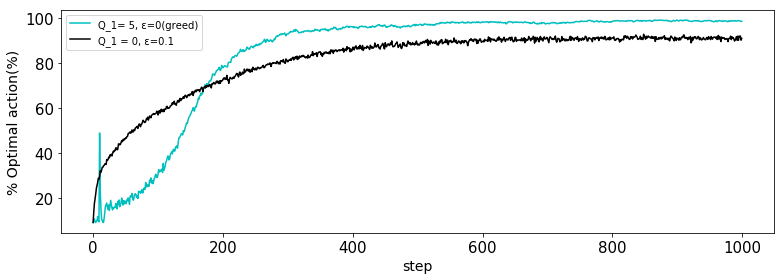

In [22]:
plt.plot(np.arange(STEP), g_OPTIMAL_ACTIONS, 'c-', np.arange(STEP), e01_OPTIMAL_ACTIONS,'k-')
plt.legend(["Q_1= 5, ε=0(greed)", "Q_1 = 0, ε=0.1"])
plt.xlabel("step")
plt.ylabel("% Optimal action(%)")
save_fig("optimistic_initial_value_%Optimal_action")
plt.show()

## 2.7 Upper-Confidence_Bound Action Selection

In [10]:
def bandit(action):
    return np.random.normal(q_rewards[action],1)

def greedy_action_selection(t, q, epsilon = 0):

    rand = np.random.rand(1)[0]

    if t <= 0 or epsilon >= rand:            
        return np.random.choice(NUM_OF_ACTION,1)[0]
    else:
        return argmax(q)

def UCB_action_selection(t, q, c, n):
    
    tmp_q = q.copy()
    
    if t <= 0:            
        return np.random.choice(NUM_OF_ACTION,1)[0]
    else:
        for a in range(NUM_OF_ACTION):
            if n[a] == 0:
                tmp_q[a] = np.inf
            else:
                tmp_q[a] += c*np.sqrt(np.log(t)/n[a])
        return argmax(tmp_q)
    
def argmax(array):
    top_index = [0]
    top = array[0]
    
    for i in range(1,len(array)):
        if array[i] > top:
            top_index = [i]
            top = array[i]
        elif array[i] == top:
            top_index.append(i)
        
    np.random.shuffle(top_index)
        
    return top_index[0]

In [24]:
## simple bandit algorithm with step-size parameter, α = 0.1

STEP = 1000
RUN = 2000
NUM_OF_ACTION = 10

q_rewards = []
for _ in range(NUM_OF_ACTION):
    tmp = np.random.normal(0,1)
    q_rewards.append(tmp)
    
optimal_action = np.argmax(q_rewards)

UCB_OPTIMAL_ACTIONS = [0]*STEP
UCB_AVERAGE_REWARDS = [0]*STEP

e01_OPTIMAL_ACTIONS = [0]*STEP
e01_AVERAGE_REWARDS = [0]*STEP

## 10-armed testbed
for i in tqdm_notebook(range(RUN)):

    # Upper-Confidence_Bound Action Selection with c = 2
    Q = [0]*NUM_OF_ACTION
    N = [0]*NUM_OF_ACTION

    for t in range(STEP):
        A = UCB_action_selection(t, Q, 2, N)
        R = bandit(A)
        N[A] += 1
        Q[A] += (1/N[A])*(R-Q[A])
        
        UCB_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            UCB_OPTIMAL_ACTIONS[t] += 1/RUN*100
            
    # greedy ε = 0.1
    Q = [0]*NUM_OF_ACTION
    N = [0]*NUM_OF_ACTION

    for t in range(STEP):
        A = greedy_action_selection(t, Q, 0.1)
        R = bandit(A)
        N[A] +=1
        Q[A] += (1/N[A])*(R-Q[A])
        
        e01_AVERAGE_REWARDS[t] += R/RUN
        if A == optimal_action:
            e01_OPTIMAL_ACTIONS[t] += 1/RUN*100

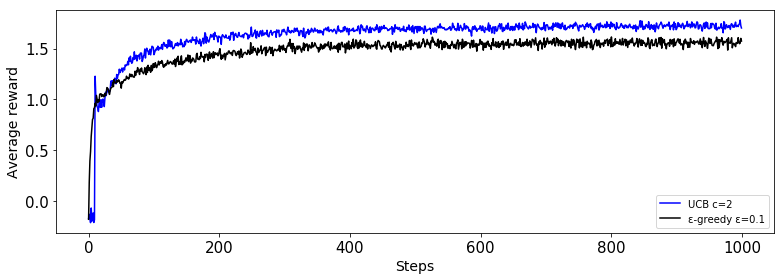

In [25]:
plt.plot(np.arange(STEP), UCB_AVERAGE_REWARDS, 'b-', np.arange(STEP), e01_AVERAGE_REWARDS,'k-')
plt.legend(["UCB c=2", "ε-greedy ε=0.1"])
plt.xlabel("Steps")
plt.ylabel("Average reward")
save_fig("UCB_average_reward")
plt.show()